# Scrape tweets and save as txt files

In [ ]:
''' pip install getoldtweets3 '''

In [ ]:
''' import GetOldTweets3 as got
def scrape_tweets(username):
  username = username
  count = 2000
  # Creation of query object
  tweetCriteria = got.manager.TweetCriteria().setUsername(username)\
                                          .setMaxTweets(count)
  # Creation of list that contains all tweets
  tweets = got.manager.TweetManager.getTweets(tweetCriteria)
  # Creating list of chosen tweet data
  user_tweets = [[tweet.text] for tweet in tweets]
  return user_tweets '''

In [ ]:
# Use above function to return tweets of Trump and Obama.
# If there is certificate error, try again at another time, maybe several minutes later.
# Your code here:

In [ ]:
''' trump = scrape_tweets('realDonaldTrump') '''

In [ ]:
''' obama = scrape_tweets('BarackObama') '''

In [ ]:
''' # Save all tweets to two folders
# Update the code with your own variables and paths.
# The resulted files will be in two folders just like IMDB data.
for i in range(0,len(trump)):
  path='/content/drive/My Drive/Spring Deep Learning Class material /Week 4/Assignment3/Trump/trump'+str(i)+'.txt'
  with open(path, "w") as output:
    output.write(str(trump[i])) '''

In [ ]:
''' for i in range(0,len(obama)):
  path='/content/drive/My Drive/Spring Deep Learning Class material /Week 4/Assignment3/Obama/obama'+str(i)+'.txt'
  with open(path, "w") as output:
    output.write(str(obama[i])) '''

# Loading data and prepare data for modeling

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load the data you just saved from your drive
import os
data_dir = '/content/drive/My Drive/Spring Deep Learning Class material /Week 4/Assignment3'
labels = []
texts = []
count = 0
for label_type in ['Trump/', 'Obama/']:
    dir_name = os.path.join(data_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            count = count + 1
            print(count)
            f = open(os.path.join(dir_name, fname))
            texts.append(f.read())
            f.close()
            if label_type == 'Obama/':
                labels.append(0)
            else:
                labels.append(1)

In [ ]:
# Tokenize, pad and prepare training and validation data
import keras
keras.__version__
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 20  
training_samples = 3000 
validation_samples = 1000  
max_words = 1000  


In [ ]:
# tokenizer data
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10168 unique tokens.
Shape of data tensor: (4000, 20)
Shape of label tensor: (4000,)


In [ ]:
# Split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # from 0 to (200) training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

# Modeling: Fit three models with different architecture

Model 1 convolutional 1D, Bidirectional LSTM, maxlen = 20,max_words = 1000,dimension=100

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip show tensorflow

In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os, cv2
# import the necessary packages -- cnn_regression
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from keras.optimizers import Adam, RMSprop
from numpy import savez_compressed
from keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# now, we are ready to model!
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import LSTM

# define model
embedding_dim = 100
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(max_words, embedding_dim , input_length=maxlen))

model1.add(tf.keras.layers.Convolution1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model1.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model1.add(tf.keras.layers.Dropout(0.5))

model1.add(tf.keras.layers.Bidirectional(LSTM(30)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Flatten())

model1.add(tf.keras.layers.Dense(256, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(128, activation='relu'))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model1.summary()



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 20, 100)           100000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 20, 32)            9632      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 10, 32)            0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 10, 32)            0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 60)                15120     
_________________________________________________________________
dropout_12 (Dropout)         (None, 60)                0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 60)               

In [ ]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])


In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1)

In [ ]:

history = model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, batch_size=16,verbose=1,callbacks=[es])

Epoch 1/500
188/188 [==============================] - 3s 17ms/step - loss: 0.3789 - acc: 0.8133 - val_loss: 0.1206 - val_acc: 0.9540
Epoch 2/500
188/188 [==============================] - 2s 13ms/step - loss: 0.1052 - acc: 0.9637 - val_loss: 0.1289 - val_acc: 0.9470
Epoch 3/500
188/188 [==============================] - 2s 12ms/step - loss: 0.0610 - acc: 0.9823 - val_loss: 0.1134 - val_acc: 0.9530
Epoch 4/500
188/188 [==============================] - 2s 12ms/step - loss: 0.0465 - acc: 0.9840 - val_loss: 0.1490 - val_acc: 0.9520
Epoch 5/500
188/188 [==============================] - 2s 12ms/step - loss: 0.0391 - acc: 0.9877 - val_loss: 0.1769 - val_acc: 0.9530
Epoch 6/500
188/188 [==============================] - 2s 12ms/step - loss: 0.0283 - acc: 0.9903 - val_loss: 0.2472 - val_acc: 0.9510
Epoch 7/500
188/188 [==============================] - 2s 12ms/step - loss: 0.0213 - acc: 0.9947 - val_loss: 0.2325 - val_acc: 0.9480
Epoch 8/500
188/188 [==============================] - 2s 12ms

In [ ]:
scores = model1.evaluate(x_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 93.80%


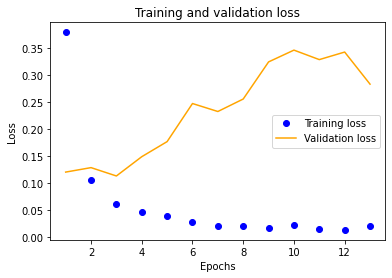

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) #acc wasn't defined before
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Confusion Matrix 
import os
from sklearn.metrics import classification_report
pred_val1= model1.predict(x_val) 
pred_val1 = np.empty(pred_val.shape)
i=0
while i < len(pred_val):
  if(pred_val1)[i] >= 0.5:
    pred_val1[i] = 1
  else:
    pred_val1[i] = 0
    i +=1
print (classification_report(y_val,pred_val1))

              precision    recall  f1-score   support

           0       0.52      1.00      0.68       518
           1       0.00      0.00      0.00       482

    accuracy                           0.52      1000
   macro avg       0.26      0.50      0.34      1000
weighted avg       0.27      0.52      0.35      1000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 2 
Bidirectional GRU, maxlen = 50, max_words = 100


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 50  
training_samples = 3000  
validation_samples = 1000  
max_words = 100 

In [ ]:
# tokenizer our data 
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10168 unique tokens.
Shape of data tensor: (4000, 20)
Shape of label tensor: (4000,)


In [ ]:
# Split the data into a training set and a validation set

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # from 0 to (200) training samples
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
# model2
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Conv2D

embedding_dim = 100
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Embedding(max_words, embedding_dim , input_length=maxlen))

model2.add(tf.keras.layers.Bidirectional(GRU(30)))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Flatten())

model2.add(tf.keras.layers.Dense(128, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.5))
model2.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 20, 100)           100000    
_________________________________________________________________
bidirectional_4 (Bidirection (None, 60)                23760     
_________________________________________________________________
dropout_15 (Dropout)         (None, 60)                0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 60)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               7808      
_________________________________________________________________
dropout_16 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [ ]:
model2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])


In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1)

In [ ]:
history = model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, batch_size=16,verbose=1,callbacks=[es])

Epoch 1/500
188/188 [==============================] - 3s 15ms/step - loss: 0.2999 - acc: 0.8777 - val_loss: 0.1450 - val_acc: 0.9390
Epoch 2/500
188/188 [==============================] - 2s 11ms/step - loss: 0.0929 - acc: 0.9687 - val_loss: 0.1333 - val_acc: 0.9510
Epoch 3/500
188/188 [==============================] - 2s 11ms/step - loss: 0.0585 - acc: 0.9830 - val_loss: 0.1608 - val_acc: 0.9500
Epoch 4/500
188/188 [==============================] - 2s 11ms/step - loss: 0.0354 - acc: 0.9903 - val_loss: 0.1920 - val_acc: 0.9420
Epoch 5/500
188/188 [==============================] - 2s 11ms/step - loss: 0.0299 - acc: 0.9907 - val_loss: 0.2381 - val_acc: 0.9410
Epoch 6/500
188/188 [==============================] - 2s 11ms/step - loss: 0.0237 - acc: 0.9933 - val_loss: 0.2542 - val_acc: 0.9450
Epoch 7/500
188/188 [==============================] - 2s 11ms/step - loss: 0.0186 - acc: 0.9953 - val_loss: 0.2935 - val_acc: 0.9430
Epoch 8/500
188/188 [==============================] - 2s 11ms

In [ ]:
scores = model2.evaluate(x_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 94.40%


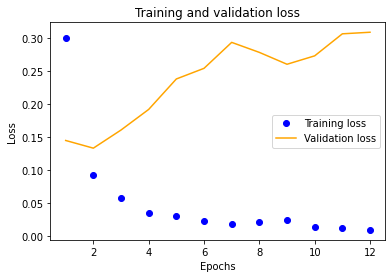

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) #acc wasn't defined before
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Confusion Matrix 
import os
from sklearn.metrics import classification_report
pred_val2= model1.predict(x_val) 
pred_val2 = np.empty(pred_val.shape)
i=0
while i < len(pred_val):
  if(pred_val2)[i] >= 0.7:
    pred_val2[i] = 1
  else:
    pred_val2[i] = 0
    i +=1
print (classification_report(y_val,pred_val2))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       510
           1       0.00      0.00      0.00       490

    accuracy                           0.51      1000
   macro avg       0.26      0.50      0.34      1000
weighted avg       0.26      0.51      0.34      1000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model 3


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

maxlen = 100 
training_samples = 3000  
validation_samples = 1000 
max_words = 10000  

In [ ]:
# tokenizer data 
tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10168 unique tokens.
Shape of data tensor: (4000, 100)
Shape of label tensor: (4000,)


In [ ]:
# Split the data into a training set and a validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = labels[training_samples: training_samples + validation_samples]

In [ ]:
# model3
from tensorflow.keras.layers import Input, Dense, SimpleRNN, LSTM, GRU, Conv2D

embedding_dim = 100
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Embedding(max_words, embedding_dim , input_length=maxlen))

model3.add(tf.keras.layers.LSTM(30))
model3.add(tf.keras.layers.Dropout(0.5))
model3.add(tf.keras.layers.Flatten())

model3.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model3.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 30)                15720     
_________________________________________________________________
dropout (Dropout)            (None, 30)                0         
_________________________________________________________________
flatten (Flatten)            (None, 30)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 1,015,751
Trainable params: 1,015,751
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:

es = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1)

In [ ]:
history = model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, batch_size=16,verbose=1,callbacks=[es])

Epoch 1/500
188/188 [==============================] - 3s 18ms/step - loss: 0.3305 - acc: 0.8920 - val_loss: 0.1476 - val_acc: 0.9530
Epoch 2/500
188/188 [==============================] - 3s 15ms/step - loss: 0.0621 - acc: 0.9833 - val_loss: 0.1343 - val_acc: 0.9520
Epoch 3/500
188/188 [==============================] - 3s 14ms/step - loss: 0.0183 - acc: 0.9970 - val_loss: 0.1518 - val_acc: 0.9600
Epoch 4/500
188/188 [==============================] - 3s 15ms/step - loss: 0.0100 - acc: 0.9983 - val_loss: 0.2179 - val_acc: 0.9450
Epoch 5/500
188/188 [==============================] - 3s 15ms/step - loss: 0.0070 - acc: 0.9993 - val_loss: 0.1955 - val_acc: 0.9620
Epoch 6/500
188/188 [==============================] - 3s 14ms/step - loss: 0.0060 - acc: 0.9993 - val_loss: 0.2036 - val_acc: 0.9580
Epoch 7/500
188/188 [==============================] - 3s 15ms/step - loss: 0.0047 - acc: 0.9990 - val_loss: 0.2062 - val_acc: 0.9610
Epoch 8/500
188/188 [==============================] - 3s 14ms

In [ ]:
scores = model3.evaluate(x_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 96.30%


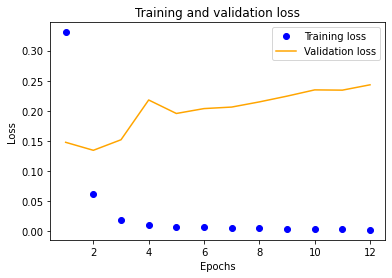

In [ ]:
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss'] 
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Confusion Matrix 
import os
from sklearn.metrics import classification_report
pred_val= model3.predict(x_val) 
pred_val = np.empty(pred_val.shape)
i=0
while i < len(pred_val):
  if(pred_val)[i] >= 0.5:
    pred_val[i] = 1
  else:
    pred_val[i] = 0
    i +=1
print (classification_report(y_val,pred_val))

              precision    recall  f1-score   support

           0       0.48      1.00      0.65       482
           1       0.00      0.00      0.00       518

    accuracy                           0.48      1000
   macro avg       0.24      0.50      0.33      1000
weighted avg       0.23      0.48      0.31      1000



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Analysis: Compare the results and talk about how you improve the results

In [ ]:
"""#The first model we set the model architecture as one convolutional 1D, Bidirectional LSTM, Dense layers; I only consider the top 1000 words and 
the first 20 words comments. Moreover, I deciede to use 100 demensions to represent per word. As a result, we get get results accuracy is 93%, which is very high.
However, when I plot the result, I found that the model is overfit, cause it perform very well at training dataset, but it is not very well in validation datasets.
In the second model, I try to let model learn more information so that it can avoid overfit. I set the model architecture as Bidirectional GRU, maxlen = 50, max_words = 100
But the model is also overfit. In the third model, I allowed the model lewarn top 10000 words and consider the fist 100 words so that can learn more information. 
I also try different architecture, I only use simply LSTM to built model. As a result, the modle still overfit, but seems better. On the other hand, when compare the 
confusion matrix, I found that all model cannot predict 1 in validation, which is Trumps.
